# Plot doubling CO2 cases

Thanks to Tim Andrews for his data

Theme Song: Cemented Shoes<br>
Artist: My Vitriol<br>
Album: Finelines<br>
Released: 2001

In [17]:
from fair.forcing.ghg import meinshausen, etminan, myhre
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np

In [18]:
ghg_obs = pd.read_excel('../data_input/observations/LLGHG_history_AR6_v9_updated.xlsx', skiprows=22, sheet_name="MR_output", index_col=0)
for addyear in range(1751,1850):
    ghg_obs.loc[addyear, 'YYYY'] = np.nan
ghg_obs = ghg_obs.sort_index()
ghg_obs = ghg_obs.interpolate()

In [3]:
co2_pi = ghg_obs.loc[1750,'CO2']
ch4_pi = ghg_obs.loc[1750,'CH4']
n2o_pi = ghg_obs.loc[1750,'N2O']

In [44]:
logrange = np.logspace(np.log(1/8)/np.log(10),np.log(32)/np.log(10),501)
co2 = co2_pi * logrange

In [45]:
meins = np.zeros(501)
etm = np.zeros(501)
my = np.zeros(501)
for i in range(501):
    meins[i] = meinshausen(np.array([co2[i], ch4_pi, n2o_pi]), Cpi=np.array([co2_pi, ch4_pi, n2o_pi]), scale_F2x=False)[0]
    etm[i] = etminan(np.array([co2[i], ch4_pi, n2o_pi]), Cpi=np.array([co2_pi, ch4_pi, n2o_pi]), scale_F2x=False)[0]
    my[i] = myhre(np.array([co2[i], ch4_pi, n2o_pi]), Cpi=np.array([co2_pi, ch4_pi, n2o_pi]), scale_F2x=False)[0]

AttributeError: module 'matplotlib.pyplot' has no attribute 'xtick_labels'

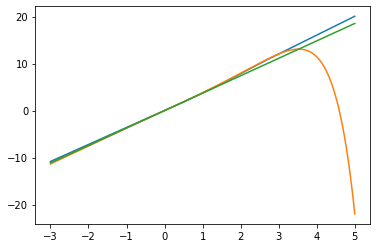

In [47]:
pl.plot(np.log(logrange)/np.log(2), meins)
pl.plot(np.log(logrange)/np.log(2), etm)
pl.plot(np.log(logrange)/np.log(2), my)
pl.xtick_labels([1/8, 1/4, 1/2, 1, 2, 4, 8, 16, 32])

In [4]:
m4x = meinshausen(np.array([4*co2_pi, ch4_pi, n2o_pi]), Cpi=np.array([co2_pi, ch4_pi, n2o_pi]), scale_F2x=False)
m2x = meinshausen(np.array([2*co2_pi, ch4_pi, n2o_pi]), Cpi=np.array([co2_pi, ch4_pi, n2o_pi]), scale_F2x=False)
m2x[0]/m4x[0]

0.47630403979167685

In [5]:
e4x = etminan(np.array([4*co2_pi, ch4_pi, n2o_pi]), Cpi=np.array([co2_pi, ch4_pi, n2o_pi]), scale_F2x=False)
e2x = etminan(np.array([2*co2_pi, ch4_pi, n2o_pi]), Cpi=np.array([co2_pi, ch4_pi, n2o_pi]), scale_F2x=False)
e2x[0]/e4x[0]

0.4780337002434125

In [6]:
e2x[0]

3.80195857817616

In [7]:
m2x[0]

3.746826975133355

In [8]:
etminan(np.array([2*co2_2011, ch4_2011, n2o_2011]), Cpi=np.array([co2_2011, ch4_2011, n2o_2011]), scale_F2x=False)

array([3.83754147, 0.        , 0.        ])

In [9]:
meinshausen(np.array([2*co2_2011, ch4_2011, n2o_2011]), Cpi=np.array([co2_2011, ch4_2011, n2o_2011]), scale_F2x=False)

array([3.79059855, 0.        , 0.        ])

In [10]:
meinshausen(np.array([284.3*2, ch4_pi, n2o_pi]), Cpi=np.array([284.3, ch4_pi, n2o_pi]), scale_F2x=False)

array([3.7494039, 0.       , 0.       ])

In [11]:
etminan(np.array([co2_2019, ch4_2019, n2o_2019]), Cpi=np.array([co2_pi, ch4_pi, n2o_pi]), scale_F2x=False)

array([2.08539106, 0.62916705, 0.19523587])

In [12]:
meinshausen(np.array([co2_2019, ch4_2019, n2o_2019]), Cpi=np.array([co2_pi, ch4_pi, n2o_pi]), scale_F2x=False)

array([2.05359802, 0.63253836, 0.19482489])

In [13]:
meinshausen(np.array([2*co2_pi, ch4_pi, n2o_pi]), Cpi=np.array([co2_pi, ch4_pi, n2o_pi]), scale_F2x=False) * np.array([1.05, 0.86, 1.07])

array([3.93416832, 0.        , 0.        ])

In [14]:
meinshausen(np.array([2*co2_pi, ch4_pi, n2o_pi]), Cpi=np.array([co2_pi, ch4_pi, n2o_pi]), scale_F2x=False)

array([3.74682698, 0.        , 0.        ])

In [15]:
meinshausen(np.array([2*co2_1850, ch4_1850, n2o_1850]), Cpi=np.array([co2_1850, ch4_1850, n2o_1850]), scale_F2x=False) * np.array([1.05, 0.86, 1.07])

array([3.93731869, 0.        , 0.        ])

In [16]:
etminan(np.array([2*co2_pi, ch4_pi, n2o_pi]), Cpi=np.array([co2_pi, ch4_pi, n2o_pi]), scale_F2x=False)

array([3.80195858, 0.        , 0.        ])

In [17]:
etminan(np.array([2*co2_pi, ch4_pi, n2o_pi]), Cpi=np.array([co2_pi, ch4_pi, n2o_pi]), scale_F2x=False) * np.array([1.05, 0.86, 1.07])

array([3.99205651, 0.        , 0.        ])

In [18]:
print(etminan(np.array([700, 1800, 323]), Cpi=np.array([389, 1800, 323]), scale_F2x=False))
print(meinshausen(np.array([700, 1800, 323]), Cpi=np.array([389, 1800, 323]), scale_F2x=False))

[3.22707066 0.         0.        ]
[3.18558871 0.         0.        ]


In [19]:
print(etminan(np.array([389, 1800, 323]), Cpi=np.array([180, 1800, 323]), scale_F2x=False))
print(meinshausen(np.array([389, 1800, 323]), Cpi=np.array([180, 1800, 323]), scale_F2x=False))

[4.18614974 0.         0.        ]
[4.12898865 0.         0.        ]


In [20]:
print(etminan(np.array([700, 1800, 323]), Cpi=np.array([180, 1800, 323]), scale_F2x=False))
print(meinshausen(np.array([700, 1800, 323]), Cpi=np.array([180, 1800, 323]), scale_F2x=False))

[7.60776501 0.         0.        ]
[7.52110683 0.         0.        ]


In [21]:
3.22707066 +4.18614974 

7.4132204

In [22]:
3.18558871 + 4.12898865 

7.31457736

### chapter 2 1750

In [23]:
print(etminan(np.array([2*co2_pi, ch4_pi, n2o_pi]), Cpi=np.array([co2_pi, ch4_pi, n2o_pi]), scale_F2x=False))
print(etminan(np.array([2*co2_pi, ch4_pi, n2o_pi]), Cpi=np.array([co2_pi, ch4_pi, n2o_pi]), scale_F2x=False)*np.array([1.05, 0.86, 1.07]))

print(meinshausen(np.array([2*co2_pi, ch4_pi, n2o_pi]), Cpi=np.array([co2_pi, ch4_pi, n2o_pi]), scale_F2x=False))
print(meinshausen(np.array([2*co2_pi, ch4_pi, n2o_pi]), Cpi=np.array([co2_pi, ch4_pi, n2o_pi]), scale_F2x=False)*np.array([1.05, 0.86, 1.07]))

[3.80195858 0.         0.        ]
[3.99205651 0.         0.        ]
[3.74682698 0.         0.        ]
[3.93416832 0.         0.        ]


### Meinshausen et al original 1750

In [24]:
print(etminan(np.array([2*277.15, ch4_pi, 273.87]), Cpi=np.array([277.15, ch4_pi, 273.87]), scale_F2x=False))
print(etminan(np.array([2*277.15, ch4_pi, 273.87]), Cpi=np.array([277.15, ch4_pi, 273.87]), scale_F2x=False)*np.array([1.05, 0.86, 1.07]))

print(meinshausen(np.array([2*277.15, ch4_pi, 273.87]), Cpi=np.array([277.15, ch4_pi, 273.87]), scale_F2x=False))
print(meinshausen(np.array([2*277.15, ch4_pi, 273.87]), Cpi=np.array([277.15, ch4_pi, 273.87]), scale_F2x=False)*np.array([1.05, 0.86, 1.07]))

[3.80094215 0.         0.        ]
[3.99098926 0.         0.        ]
[3.74616138 0.         0.        ]
[3.93346945 0.         0.        ]


### Meinshausen CMIP6 1850

In [25]:
print(etminan(np.array([2*284.32, ch4_pi, 273.02]), Cpi=np.array([284.32, ch4_pi, 273.02]), scale_F2x=False))
print(etminan(np.array([2*284.32, ch4_pi, 273.02]), Cpi=np.array([284.32, ch4_pi, 273.02]), scale_F2x=False)*np.array([1.05, 0.86, 1.07]))

print(meinshausen(np.array([2*284.32, ch4_pi, 273.02]), Cpi=np.array([284.32, ch4_pi, 273.02]), scale_F2x=False))
print(meinshausen(np.array([2*284.32, ch4_pi, 273.02]), Cpi=np.array([284.32, ch4_pi, 273.02]), scale_F2x=False)*np.array([1.05, 0.86, 1.07]))

[3.80397448 0.         0.        ]
[3.9941732 0.        0.       ]
[3.74928048 0.         0.        ]
[3.93674451 0.         0.        ]


### Etminan 2011 values

In [26]:
print(etminan(np.array([2*389, ch4_pi, 323]), Cpi=np.array([389, ch4_pi, 323]), scale_F2x=False))
print(etminan(np.array([2*389, ch4_pi, 323]), Cpi=np.array([389, ch4_pi, 323]), scale_F2x=False)*np.array([1.05, 0.86, 1.07]))

print(meinshausen(np.array([2*389, ch4_pi, 323]), Cpi=np.array([389, ch4_pi, 323]), scale_F2x=False))
print(meinshausen(np.array([2*389, ch4_pi, 323]), Cpi=np.array([389, ch4_pi, 323]), scale_F2x=False)*np.array([1.05, 0.86, 1.07]))

[3.83721632 0.         0.        ]
[4.02907714 0.         0.        ]
[3.79008967 0.         0.        ]
[3.97959416 0.         0.        ]


### chapter 2 2019

In [27]:
print(etminan(np.array([2*co2_2019, ch4_2019, n2o_2019]), Cpi=np.array([co2_2019, ch4_2019, n2o_2019]), scale_F2x=False))
print(etminan(np.array([2*co2_2019, ch4_2019, n2o_2019]), Cpi=np.array([co2_2019, ch4_2019, n2o_2019]), scale_F2x=False)*np.array([1.05, 0.86, 1.07]))

print(meinshausen(np.array([2*co2_2019, ch4_2019, n2o_2019]), Cpi=np.array([co2_2019, ch4_2019, n2o_2019]), scale_F2x=False))
print(meinshausen(np.array([2*co2_2019, ch4_2019, n2o_2019]), Cpi=np.array([co2_2019, ch4_2019, n2o_2019]), scale_F2x=False)*np.array([1.05, 0.86, 1.07]))

[3.84352774 0.         0.        ]
[4.03570412 0.         0.        ]
[3.79782409 0.         0.        ]
[3.9877153 0.        0.       ]
